In [1]:

import pandas as pd
import numpy as np

In [2]:
aqi = pd.read_csv('modified_c4_epa_air_quality.csv')

In [3]:
print("Use describe() to summarize AQI")
print(aqi.describe(include='all'))

print("For a more thorough examination of observations by state use values_counts()")
print(aqi['state_name'].value_counts())

Use describe() to summarize AQI
        date_local  state_name  county_name      city_name local_site_name  \
count          260         260          260            260             257   
unique           1          52          149            190             253   
top     2018-01-01  California  Los Angeles  Not in a city         Kapolei   
freq           260          66           14             21               2   
mean           NaN         NaN          NaN            NaN             NaN   
std            NaN         NaN          NaN            NaN             NaN   
min            NaN         NaN          NaN            NaN             NaN   
25%            NaN         NaN          NaN            NaN             NaN   
50%            NaN         NaN          NaN            NaN             NaN   
75%            NaN         NaN          NaN            NaN             NaN   
max            NaN         NaN          NaN            NaN             NaN   

         parameter_name   units

In [ ]:
# Summarize the mean AQI for RRE states.

# Create a list of RRE states.

rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

# Subset `aqi` to only consider these states.

aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states.

aqi_rre.groupby(['state_name']).agg({"aqi_log":"mean","state_name":"count"}) #alias as aqi_rre

,aqi_log,state_name
state_name,,
California,2.413149,66
Florida,1.782627,12
Michigan,2.132079,9
Ohio,1.428586,12
Pennsylvania,1.257868,10
Texas,1.283000,10


Construct a boxplot visualization for the AQI of these states
Seaborn is a simple visualization library, commonly imported as sns. Import seaborn. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

In [6]:
import seaborn as sns

<Axes: xlabel='state_name', ylabel='aqi_log'>

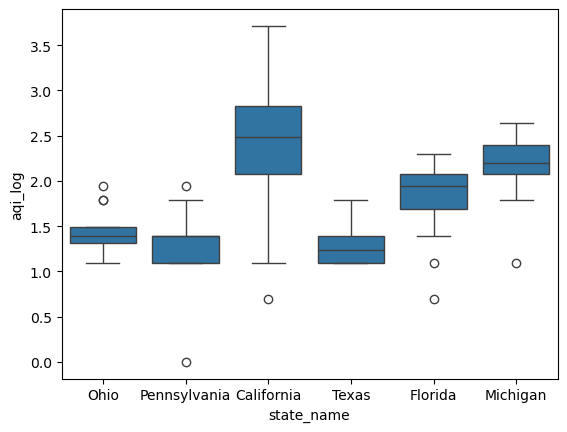

In [8]:
sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi_log"])

Construct a confidence interval for the RRE state with the highest mean AQI
Recall the four-step process for constructing a confidence interval:

Identify a sample statistic.
Choose a confidence level.
Find the margin of error.
Calculate the interval.

In [9]:
# Find the mean aqi for california state.

aqi_ca = aqi[aqi['state_name']=='California']

sample_mean = aqi_ca['aqi_log'].mean()
sample_mean

2.413148768367913

In [10]:
# Input your confidence level.

confidence_level = 0.95
confidence_level

0.95

Find your margin of error (ME)
Recall margin of error = z * standard error, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

Find your z-value.
Find the approximate z for common confidence levels.
Calculate your standard error estimate.

In [12]:
# Calculate your margin of error.

# Begin by identifying the z associated with your chosen confidence level.

z_value = 1.96

# Next, calculate your standard error.

standard_error = aqi_ca['aqi_log'].std() / np.sqrt(aqi_ca.shape[0])
print("standard error:")
print(standard_error)

# Lastly, use the preceding result to calculate your margin of error.

margin_of_error = standard_error * z_value
print("margin of error:")
print(margin_of_error)

standard error:
0.07415163645963528
margin of error:
0.14533720746088516


In [13]:
# Calculate your confidence interval (upper and lower limits).

### YOUR CODE HERE ###

upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)

(2.267811560907028, 2.558485975828798)

Alternative: Construct the interval using scipy.stats.norm.interval()
scipy presents a simpler solution to developing a confidence interval. To use this, first import the stats module from scipy.

In [18]:
from scipy import stats

In [20]:
stats.norm.interval(confidence_level, loc=sample_mean, scale=standard_error)

(2.2678142315123204, 2.5584833052235054)